# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

The chromedriver version (123.0.6312.122) detected in PATH at C:\Users\alee\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe might not be compatible with the detected chrome version (124.0.6367.61); currently, chromedriver 124.0.6367.60 is recommended for chrome 124.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data

# Find the table containing weather data
table = soup.find('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Read the table into a DataFrame

df = pd.read_html(str(table))[0]

C:\Users\alee\AppData\Local\Temp\ipykernel_7004\4240449790.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [7]:
# Confirm DataFrame was created successfully
display(df)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
print(df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [9]:
# Change data types

df['id'] = df['id'].astype(object)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Confirm type changes were successful by examining data types again

print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

In [10]:
# 1. How many months are there on Mars?

# Count the number of unique months
num_months = df['month'].nunique()

# Print the result
print(num_months)

12


In [11]:
# Create a DataFrame from the Series
month_counts_df = pd.DataFrame({'Month': df['month'].value_counts().sort_index().index,
                                'Count': df['month'].value_counts().sort_index().values})

# Convert DataFrame to string without header and index
month_counts_string = month_counts_df.to_string(index=False, header=False)

# Get the column name and data type
column_info = f"Name: {month_counts_df.columns[0]}, dtype: {month_counts_df.dtypes[0]}"

# Concatenate the strings
output_string = f"{month_counts_string}\n{column_info}"

# Print the output string
print(output_string)

 1 174
 2 178
 3 192
 4 194
 5 149
 6 147
 7 142
 8 141
 9 134
10 112
11 138
12 166
Name: Month, dtype: int64


C:\Users\alee\AppData\Local\Temp\ipykernel_7004\451281427.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  column_info = f"Name: {month_counts_df.columns[0]}, dtype: {month_counts_df.dtypes[0]}"


In [12]:
# 2. How many Martian days' worth of data are there?

num_sols = df['sol'].nunique()

print(num_sols)

1867


In [13]:
# 3. What is the average low temperature by month?

# Which month, on average, has the lowest temperature? The highest?
avg_min_temp_month = df.groupby('month')['min_temp'].mean()

print(avg_min_temp_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


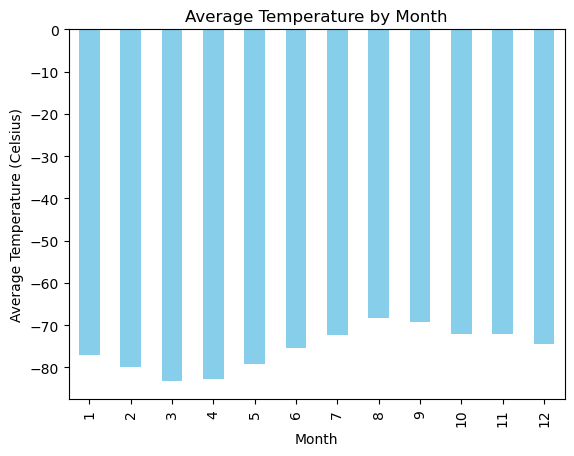

In [14]:
# Plot the average temperature by month

# Group the data by month and calculate the average temperature
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
avg_temp_by_month.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


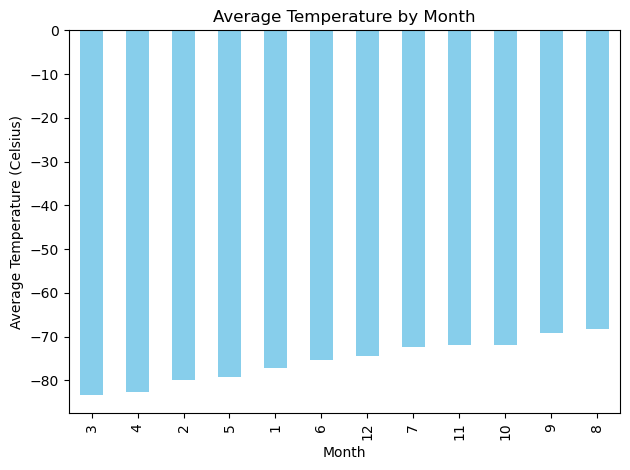

In [15]:
# Identify the coldest and hottest months in Curiosity's location

# Group the data by month and calculate the average minimum temperature
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the average temperature by month in ascending order
avg_temp_by_month_sorted = avg_temp_by_month.sort_values()

# Plot the average temperature by month
avg_temp_by_month_sorted.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
# 4. Average pressure by Martian month

avg_pressure_month = df.groupby('month')['pressure'].mean()

print(avg_pressure_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


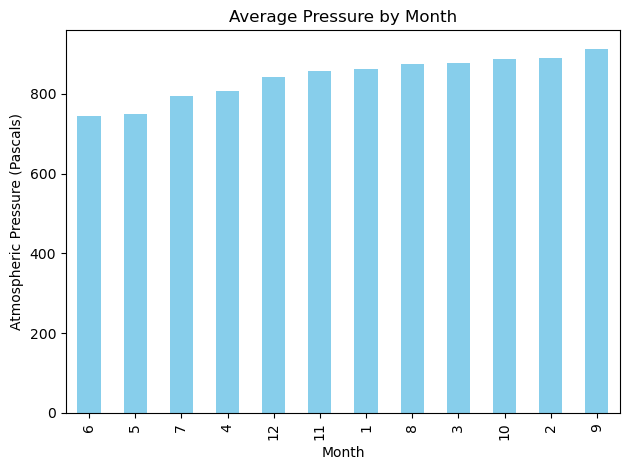

In [17]:
# Plot the average pressure by month

# Group the data by month and calculate the average pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the average temperature by month in ascending order
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values()

# Plot the average temperature by month
avg_pressure_by_month_sorted.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (Pascals)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

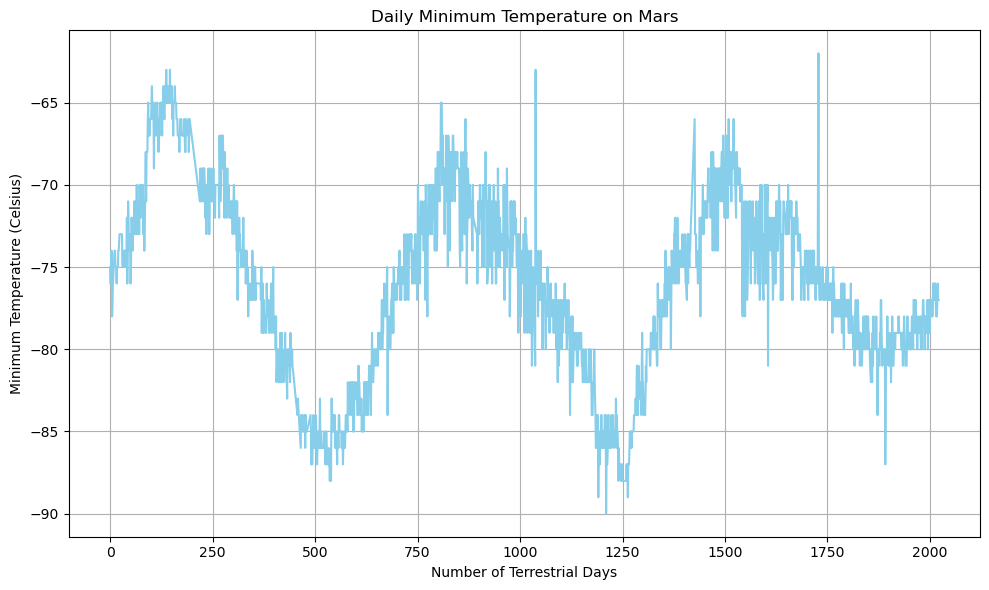

In [18]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Calculate the number of days since the start of the data
df['terrestrial_days'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

# Plot daily minimum temperature

plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_days'], df['min_temp'], color='skyblue', linestyle='-')

# Set the title and labels
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
#  On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. 

#  But it is always very cold there in human terms!

In [20]:
#  Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

In [21]:
#  The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot.

#  Internet search confirms that a Mars year is equivalent to 687 earth days.

In [24]:
# Export dataframe as a csv

df.to_csv('output.csv', index=False)

In [23]:
browser.quit()